In [37]:
import pandas as pd
class Loading:
    """ 
    Class to load data from a specified path using a given read method.
    
    Attributes:
        path (str): The path to the data file.
        read_method (function): The method used to read the data.
        data (DataFrame): The loaded data.
    """
    def __init__(self, path_,read_method_):
        """ 
        Initializes the Loading class with a file path and read method.

        Args:
            path_ (str): The file path to the data.
            read_method_ (function): The method used to read the data.
        """
        self.path=path_
        self.read_method=read_method_
        self.data=self.getData()
    
    def getData(self):
        """
        Loads the data from the specified path using the read method.

        Returns:
            DataFrame: The loaded data.
        """
        return self.read_method(self.path)

read_method_=pd.read_csv
path_=r"C:\Users\Admin\Desktop\Polestar_Work\Day-1_Preprocesing_2\Day-1_Preprocesing\housing\housing.csv"
loaderObject = Loading(path_,read_method_)
data_ = loaderObject.data

data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
class FindNullValues:
    
    def __init__(self,data):
        
        self.data=data
        self.nullColumns=self.findNullColumns()
        self.categoricalNullColumns,self.numericalNullColumns=self.seperateNullColumns()


    def findNullColumns(self):
       
        nullColumns=self.data.columns[self.data.isna().any()].tolist()
        return nullColumns
    
    def seperateNullColumns(self):
        
        numericalColumns=[]
        categoricalColumns=[]

        for i in self.nullColumns:
            if self.data[i].dtype=='o' :
                categoricalColumns.append(i)
            if self.data[i].dtype== 'float64' or 'int':
                numericalColumns.append(i)
        return categoricalColumns,numericalColumns 
    
findNullValuesObject=FindNullValues(data_)
numericalNullColumns=findNullValuesObject.numericalNullColumns
categoricalNullColumns=findNullValuesObject.categoricalNullColumns

numericalNullColumns

['total_bedrooms']

In [39]:
categoricalNullColumns

[]

In [60]:
import pandas as pd
class FillNa:
   
    def __init__(self, data, fillStrategy,columns,**kwargs):
       
        self.data = data
        self.fillStrategy = fillStrategy
        self.columns=columns
        self.filledData = self.apply(**kwargs)

    def apply(self,**kwargs):
               
            filleddata = self.data.copy()
       
            if self.fillStrategy == 'mean':
                self.fillMean(self.columns, filleddata)
            elif self.fillStrategy == 'median':
                self.fillMedian(self.columns, filleddata)
            elif self.fillStrategy == 'mode':
                self.fillMode(self.columns,filleddata)
            elif self.fillStrategy == 'drop':
                self.dropColumn(self.columns,filleddata)
            elif self.fillStrategy == 'ffill':
                self.ffillColumn(self.columns,filleddata)
            elif self.fillStrategy == 'bfill':
                self.bfillColumn(self.columns,filleddata)
            elif self.fillStrategy == 'interpolate':
                self.interpolation(self.columns,filleddata)
            elif self.fillStrategy =='movingAverage':
                self.fillMovingAverage(self.columns,filleddata,**kwargs)
            return filleddata   

    def interpolation(self,column,data):
        for i in column:
            data[i].interpolate(inplace=True)
            

    def fillMovingAverage(self, column, data,**kwargs):
       
        window=kwargs.get('window',10)
        for i in column:
            if data[i].dtype in ['float64', 'int64']:  
                data[i] = data[i].fillna(data[i].rolling(window=window, min_periods=1).mean())



    def fillMean(self, columns, data):
        for i in columns:
            mean = data[i].mean()
            data[i].fillna(mean,inplace=True)

    def fillMedian(self, columns, data):
        for i in columns:
            median = data[i].median()
            data[i].fillna(median,inplace=True)
    
    def fillMode(self, columns, data):
        for i in columns:
            mode = data[i].mode()
            data[i].fillna(mode,inplace=True)

    def dropColumn(self, columns, data):
        data.drop(columns, axis=1,inplace=True)

    def ffillColumn(self, columns, data):
        for i in columns:
            data[i].ffill(inplace=True)

    def bfillColumn(self, columns, data):
        for i in columns:
            data[i].bfill(inplace=True)
    
window=10
fillStrategy='mean'
columns=['total_bedrooms']
fillNaObject = FillNa(data_, fillStrategy,columns,window=window)
filledData_=fillNaObject.filledData

filledData_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\Admin\AppData\Local\Temp\ipykernel_17412\649088066.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(mean,inplace=True)


In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

class OneHotEncoding:

    def __init__(self,data,categoricalColumns,dtype,dropFirstColumn):

        self.data=data
        self.categoricalColumns=categoricalColumns
        self.dtype=dtype
        self.dropFirstColumn=dropFirstColumn
        self.oneHotEncodedData=self.oneHotEncoding()
        

    def oneHotEncoding(self):
        df_encoded = pd.get_dummies(self.data, columns=self.categoricalColumns,drop_first=self.dropFirstColumn, dtype=self.dtype)
        return df_encoded


dtype=float
dropFirstColumn=True
categoricalColumns_=["ocean_proximity"]
oneHotEncodedDataObject=OneHotEncoding(filledData_,categoricalColumns_,dtype,dropFirstColumn)
oneHotEncodedData_=oneHotEncodedDataObject.oneHotEncodedData

oneHotEncodedData_.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [42]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
class Outlier:

    def __init__(self,oneHotEncodedData,method,**kwargs):

        self.data=oneHotEncodedData
        self.method=method
        if(self.method=="iqr"):
            self.cleanedData=self.iqrOutlierDetectionAndRemoval(**kwargs)
        if(self.method=="zscore"):
            self.cleanedData=self.zscoreOutlierDetection(**kwargs)


    def zscoreOutlierDetection(self, **kwargs):

        threshold=kwargs.get('zscoreThreshold',3)
        z_scores = np.abs(zscore(self.data.select_dtypes(include=[np.number])))
        outliers_mask = (z_scores > threshold)
        cleaned_df = self.data[~outliers_mask.any(axis=1)].reset_index(drop=True)    
        return cleaned_df

    def iqrOutlierDetectionAndRemoval(self,**kwargs):

        
        quantile_lower=kwargs.get('quantile_lower',0.25)
        quantile_upper=kwargs.get('quantile_upper',0.75)
        multiplierLB=kwargs.get('multiplierLb',1.5)
        multiplierUB=kwargs.get('multiplierUb',1.5)
        data=pd.DataFrame(self.data)
        
        cleaned_df = data.copy()
        
        numeric_cols = cleaned_df.select_dtypes(include=['number']).columns
        for col in numeric_cols:
           
            if cleaned_df[col].nunique() <= 1:
                continue
            Q1 = cleaned_df[col].quantile(quantile_lower)
            Q3 = cleaned_df[col].quantile(quantile_upper)
            IQR = Q3 - Q1
            if IQR == 0:
                continue
            lower_bound = Q1 - multiplierLB * IQR
            upper_bound = Q3 + multiplierUB * IQR            
            cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
            if cleaned_df.empty:
                break
        return cleaned_df
    
method_outlier_="iqr"
zscoreThreshold=3
Q1=0.25
Q2=0.75
multiplierLB=1.5
multiplierUB=1.5
outlierObject=Outlier(oneHotEncodedData_,method_outlier_,zscoreThreshold=zscoreThreshold,quantile_lower=Q1,quantile_upper=Q2,multiplierLb=multiplierLB,multiplierUb=multiplierUB)
cleanedData_=outlierObject.cleanedData

cleanedData_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16899 entries, 2 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16899 non-null  float64
 1   latitude                    16899 non-null  float64
 2   housing_median_age          16899 non-null  float64
 3   total_rooms                 16899 non-null  float64
 4   total_bedrooms              16899 non-null  float64
 5   population                  16899 non-null  float64
 6   households                  16899 non-null  float64
 7   median_income               16899 non-null  float64
 8   median_house_value          16899 non-null  float64
 9   ocean_proximity_INLAND      16899 non-null  float64
 10  ocean_proximity_ISLAND      16899 non-null  float64
 11  ocean_proximity_NEAR BAY    16899 non-null  float64
 12  ocean_proximity_NEAR OCEAN  16899 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [43]:
cleanedData_['rooms_per_household']=cleanedData_['total_rooms']/cleanedData_['households']
cleanedData_['bedrooms_per_room']=cleanedData_['total_bedrooms']/cleanedData_['total_rooms']
cleanedData_['population_per_household']=cleanedData_['population']/cleanedData_['households']

cleanedData_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16899 entries, 2 to 20639
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16899 non-null  float64
 1   latitude                    16899 non-null  float64
 2   housing_median_age          16899 non-null  float64
 3   total_rooms                 16899 non-null  float64
 4   total_bedrooms              16899 non-null  float64
 5   population                  16899 non-null  float64
 6   households                  16899 non-null  float64
 7   median_income               16899 non-null  float64
 8   median_house_value          16899 non-null  float64
 9   ocean_proximity_INLAND      16899 non-null  float64
 10  ocean_proximity_ISLAND      16899 non-null  float64
 11  ocean_proximity_NEAR BAY    16899 non-null  float64
 12  ocean_proximity_NEAR OCEAN  16899 non-null  float64
 13  rooms_per_household         16899 no

In [44]:
from scipy.stats import pearsonr, kendalltau
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class CorrelationToTarget:
 

    def __init__(self, columnsToCorrelateWith, data, target):

        self.columnsToCorrelateWith = columnsToCorrelateWith
        self.target = target
        self.data = data
        self.colmnsToRelateWith = self.data[self.columnsToCorrelateWith].copy()
        self.correlationToTargetCorrMatrix = self.findingCorrelationToTargetCorrMatrix()
        self.pTestResults = self.pTest()
        self.kendallTauResults = self.kendallTau()

    def findingCorrelationToTargetCorrMatrix(self):

        corrMatrix = self.colmnsToRelateWith.corr()
        correlationToTarget = corrMatrix[self.target].sort_values(ascending=False)
        return correlationToTarget

    def pTest(self):

        results = {}
        for col in self.colmnsToRelateWith.select_dtypes(include=['number']).columns:
            if col != self.target:
                corr, p_value = pearsonr(self.colmnsToRelateWith[col], self.colmnsToRelateWith[self.target])
                results[col] = {'correlation': corr, 'p_value': p_value}
        return pd.DataFrame(results).T

    def kendallTau(self):

        results = {}
        for col in self.colmnsToRelateWith.select_dtypes(include=['number']).columns:
            if col != self.target:
                corr, kendall_value = kendalltau(self.colmnsToRelateWith[col], self.colmnsToRelateWith[self.target])
                results[col] = {'correlation': corr, 'kendallTau': kendall_value}
        return pd.DataFrame(results).T

    def plot_heatmap(self):

        corrMatrix = self.colmnsToRelateWith.corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            corrMatrix[[self.target]].sort_values(by=self.target, ascending=False),
            annot=True,
            cmap="coolwarm",
            cbar=True
        )
        plt.title(f"Heatmap of Correlations with Target: {self.target}")
        plt.show()

target='median_house_value'
columnsForCorrelation=['median_house_value','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','rooms_per_household','bedrooms_per_room','population_per_household']
correlationToTargetObject=CorrelationToTarget(columnsForCorrelation,cleanedData_,target)
correlationToTarget=correlationToTargetObject.correlationToTargetCorrMatrix
correlationToTargetPearson=correlationToTargetObject.pTestResults
correlationToTargetKandallTau=correlationToTargetObject.kendallTauResults


In [45]:
correlationToTargetPearson

,correlation,p_value
housing_median_age,0.090915,2.359486e-32
total_rooms,0.201705,1.210848e-154
total_bedrooms,0.090606,3.818267e-32
population,-0.007880,3.056767e-01
households,0.121751,8.034958e-57
median_income,0.635589,0.000000e+00
ocean_proximity_INLAND,-0.513864,0.000000e+00
ocean_proximity_ISLAND,0.036492,2.085218e-06
ocean_proximity_NEAR BAY,0.155350,9.130858e-92
ocean_proximity_NEAR OCEAN,0.141328,4.058518e-76


In [46]:
correlationToTargetKandallTau


,correlation,kendallTau
housing_median_age,0.047681,4.606200e-20
total_rooms,0.136251,2.354648e-155
total_bedrooms,0.064675,2.189203e-36
population,0.010687,3.729631e-02
households,0.086947,2.518492e-64
median_income,0.468093,0.000000e+00
ocean_proximity_INLAND,-0.464891,0.000000e+00
ocean_proximity_ISLAND,0.021437,6.454321e-04
ocean_proximity_NEAR BAY,0.122726,5.853243e-85
ocean_proximity_NEAR OCEAN,0.113309,1.062967e-72


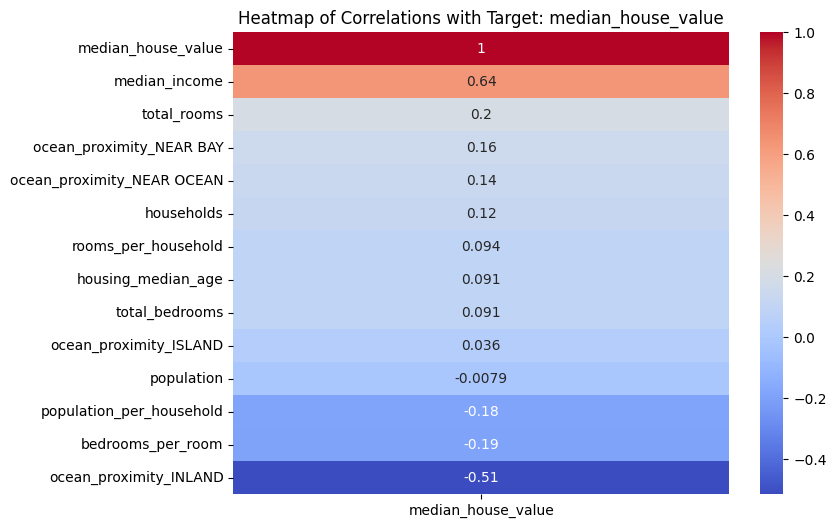

In [47]:
correlationToTargetObject.plot_heatmap()

In [48]:
targetColumn_=['median_house_value']
X = cleanedData_.drop(columns=targetColumn_)  
y = cleanedData_[targetColumn_]


In [49]:
import pandas as pd
class DropColumns:
    
    def __init__(self,data,columns):
        
        self.data=data
        self.columns=columns
        self.droppedData=self.deleteColumns()

    def deleteColumns(self):
        data = self.data.drop(self.columns,axis=1)
        return data


columnsToDrop=['total_rooms','total_bedrooms']
dropColumnsObject=DropColumns(X,columnsToDrop)
data=dropColumnsObject.droppedData
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16899 entries, 2 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16899 non-null  float64
 1   latitude                    16899 non-null  float64
 2   housing_median_age          16899 non-null  float64
 3   population                  16899 non-null  float64
 4   households                  16899 non-null  float64
 5   median_income               16899 non-null  float64
 6   ocean_proximity_INLAND      16899 non-null  float64
 7   ocean_proximity_ISLAND      16899 non-null  float64
 8   ocean_proximity_NEAR BAY    16899 non-null  float64
 9   ocean_proximity_NEAR OCEAN  16899 non-null  float64
 10  rooms_per_household         16899 non-null  float64
 11  bedrooms_per_room           16899 non-null  float64
 12  population_per_household    16899 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [50]:
import pandas as pd
from scipy.stats import pearsonr,kendalltau

import seaborn as sns

import matplotlib.pyplot as plt
class CorrelationToEachOther:
   
    def __init__(self, correlationColumns,data,threshold):
  
        self.data = data
        self.threshold=threshold
        self.correlationColumns=correlationColumns
        self.colmnsToRelateWith = pd.DataFrame()
        self.colmnsToRelateWith = self.data[self.correlationColumns].copy()
        self.correlatedPairs, self.correlatedColumn = self.correlationToEachOther()
        self.pTestResultsofIndependentPairs = self.pTest()
        self.kendalTauResultsOfIndependentPairs= self.kendallTau()

    def correlationToEachOther(self):
       
        correlated_column = set()
        correlated_pairs = []
        corr_matrix = self.colmnsToRelateWith.corr()

        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.threshold:
                    correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
                    correlated_column.add(corr_matrix.columns[i])

        return correlated_pairs, correlated_column

    def plotHeatmap(self):
        
        corr_matrix = self.colmnsToRelateWith.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
        plt.title("Correlation Matrix Heatmap")
        plt.show()

    def pTest(self):
      
        results = []
        numeric_cols = self.colmnsToRelateWith.select_dtypes(include=['number']).columns

        for i in range(len(numeric_cols)):
            for j in range(i + 1, len(numeric_cols)):  # Ensure no duplicate pairs or self-comparisons
                col1, col2 = numeric_cols[i], numeric_cols[j]
                corr, p_value = pearsonr(self.colmnsToRelateWith[col1], self.colmnsToRelateWith[col2])
                results.append({
                    'Column1': col1,
                    'Column2': col2,
                    'Correlation': corr,
                    'P-Value': p_value
                })

        return pd.DataFrame(results)


    def kendallTau(self):
      
        results = []
        numeric_cols = self.colmnsToRelateWith.select_dtypes(include=['number']).columns

        for i in range(len(numeric_cols)):
            for j in range(i + 1, len(numeric_cols)):  # Ensure no duplicate pairs or self-comparisons
                col1, col2 = numeric_cols[i], numeric_cols[j]
                corr, kendall_value = kendalltau(self.colmnsToRelateWith[col1], self.colmnsToRelateWith[col2])
                results.append({
                    'Column1': col1,
                    'Column2': col2,
                    'Correlation': corr,
                    'KendallTau-Value': kendall_value
                })

        return pd.DataFrame(results)


threshold=0.9
columnsForCorrelation=['median_house_value','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','rooms_per_household','bedrooms_per_room','population_per_household']
correlationToEachOtherObject=CorrelationToEachOther(columnsForCorrelation,cleanedData_,threshold)
correlatedPairs=correlationToEachOtherObject.correlatedPairs
correlatedPairs

[('households', 'total_bedrooms')]

In [51]:
pTestIndependentPairs=correlationToEachOtherObject.pTestResultsofIndependentPairs
pTestIndependentPairs

,Column1,Column2,Correlation,P-Value
0,median_house_value,housing_median_age,0.090915,2.359486e-32
1,median_house_value,total_rooms,0.201705,1.210848e-154
2,median_house_value,total_bedrooms,0.090606,3.818267e-32
3,median_house_value,population,-0.007880,3.056767e-01
4,median_house_value,households,0.121751,8.034958e-57
...,...,...,...,...
86,ocean_proximity_NEAR OCEAN,bedrooms_per_room,0.061800,8.926145e-16
87,ocean_proximity_NEAR OCEAN,population_per_household,-0.077812,4.072866e-24
88,rooms_per_household,bedrooms_per_room,-0.358882,0.000000e+00
89,rooms_per_household,population_per_household,-0.048927,1.970639e-10


In [52]:
kendalTauIndependentPairs=correlationToEachOtherObject.kendalTauResultsOfIndependentPairs
kendalTauIndependentPairs

,Column1,Column2,Correlation,KendallTau-Value
0,median_house_value,housing_median_age,0.047681,4.606200e-20
1,median_house_value,total_rooms,0.136251,2.354648e-155
2,median_house_value,total_bedrooms,0.064675,2.189203e-36
3,median_house_value,population,0.010687,3.729631e-02
4,median_house_value,households,0.086947,2.518492e-64
...,...,...,...,...
86,ocean_proximity_NEAR OCEAN,bedrooms_per_room,0.054085,7.275832e-18
87,ocean_proximity_NEAR OCEAN,population_per_household,-0.100330,1.981712e-57
88,rooms_per_household,bedrooms_per_room,-0.717406,0.000000e+00
89,rooms_per_household,population_per_household,0.001921,7.079457e-01


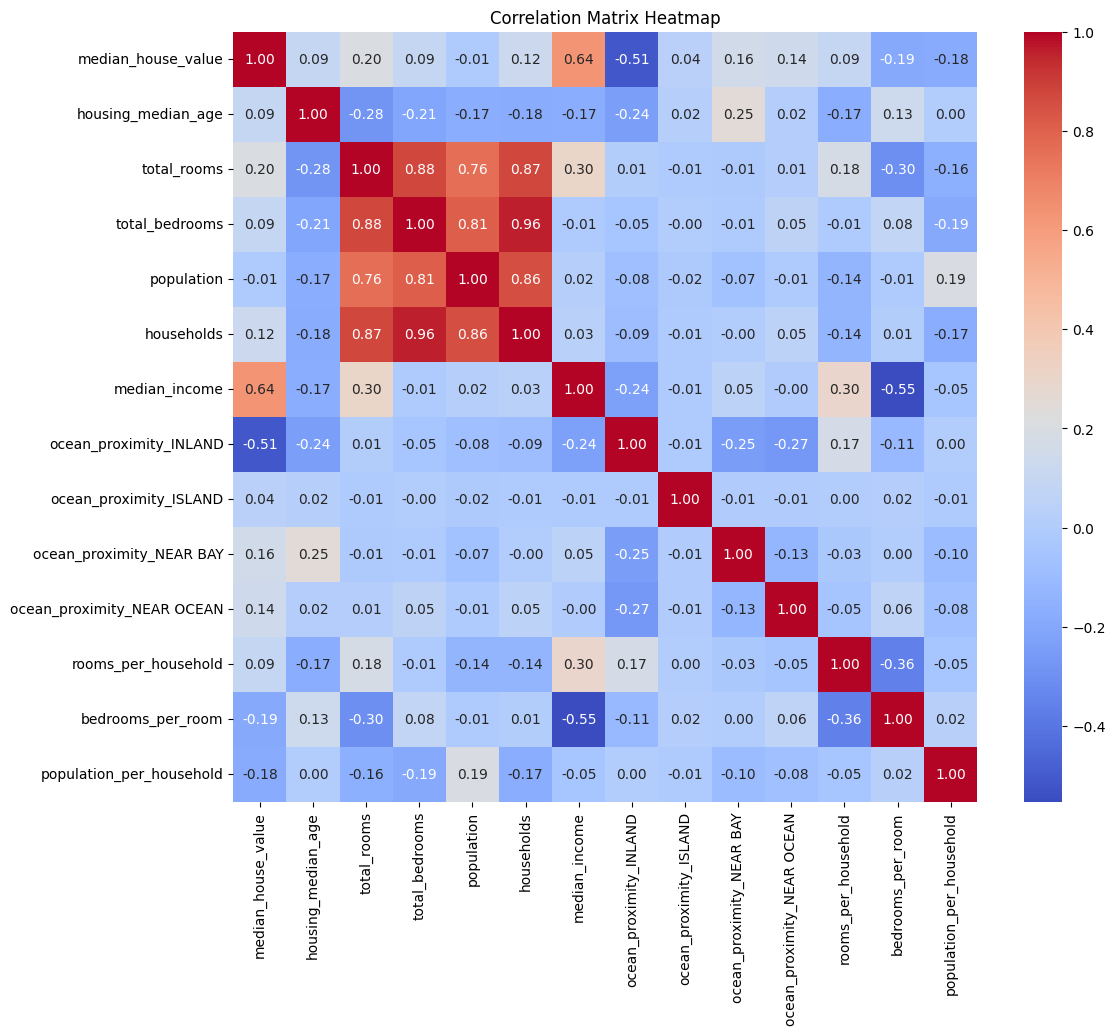

In [53]:
correlationToEachOtherObject.plotHeatmap()

In [54]:
from sklearn.model_selection import train_test_split

class TrainTestSplit:
   
    def __init__(self, X,y,**kwargs):
       
        self.X=X
        self.y=y
        self.testSize=kwargs.get('testSize',0.2)
        self.randomState=kwargs.get('random_State',25)
        self.xTrain, self.xTest, self.yTrain, self.yTest = self.trainTestSplit()
        
    def trainTestSplit(self):
      
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=self.testSize, random_state=self.randomState)
        return X_train, X_test, y_train, y_test
    
testSize=0.2
randomState=15
trainTestSplitObject=TrainTestSplit(data, y ,testSize=testSize, random_State=randomState)


xtrain_=trainTestSplitObject.xTrain
ytrain_=trainTestSplitObject.yTrain
xtest_=trainTestSplitObject.xTest
ytest_=trainTestSplitObject.yTest

In [55]:
from sklearn.preprocessing import PowerTransformer,RobustScaler,StandardScaler,MinMaxScaler
import numpy as np
import pandas as pd
class Standardization:
   
    def __init__(self, xtrain,xtest,method): 
        
        self.xTrain = xtrain
        self.xTest = xtest
        self.method = method
        if(self.method=='yeo-johnson' or 'box-cox'):
            self.pt = None
            self.xTrain_transformed = self.powerTransformer()
            self.xTest_transformed = self.powerTransformTest()
        
        
    def powerTransformer(self):
       
        data = pd.DataFrame(self.xTrain).copy()
        not_one_hot_columns = [
            col for col in data.columns 
            if data[col].dtype in [np.int64, np.float64] and not set(data[col].dropna()) <= {0, 1, 0.0, 1}
        ]
        self.pt = PowerTransformer(method=self.method)
        data[not_one_hot_columns] = self.pt.fit_transform(data[not_one_hot_columns])
        return data

    def powerTransformTest(self):
        
        data = pd.DataFrame(self.xTest).copy()
        not_one_hot_columns = [
            col for col in data.columns 
            if data[col].dtype in [np.int64, np.float64] and not set(data[col].dropna()) <= {0, 1, 0.0, 1}
        ]
        data[not_one_hot_columns] = self.pt.transform(data[not_one_hot_columns])
        return data


method_ = 'yeo-johnson'
standardizationObject = Standardization(xtrain_, xtest_, method_)
standardizedXTrain=standardizationObject.xTrain_transformed
standardizedXTest=standardizationObject.xTest_transformed

standardizedXTrain.head()

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
8534,4.440892e-16,-0.832401,0.925789,-0.880248,-0.308713,-0.338387,0.0,0.0,0.0,0.0,-0.875604,0.991112,-1.537744
9769,-6.383782e-16,0.483767,-0.599859,2.212698,1.136527,-0.528955,0.0,0.0,0.0,0.0,-0.287792,0.277963,1.453921
19797,-1.276756e-15,1.804754,-0.186244,-0.486107,-0.303149,-1.255496,1.0,0.0,0.0,0.0,-0.261394,0.513911,-0.424693
7597,4.996004e-16,-0.838706,0.217780,0.186283,-0.594118,-0.988395,0.0,0.0,0.0,0.0,-0.939843,0.615635,1.642432
2501,-3.053113e-16,0.620985,-0.350425,-0.304392,-0.694717,-1.346417,1.0,0.0,0.0,0.0,-1.244036,1.232028,0.939785


In [56]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

class VIF:
    
    def __init__(self,data,threshold,columnsForCorrelation):
        
        self.data=data
        self.columnsForCorrelation=columnsForCorrelation
        self.dataToCorrelate=pd.DataFrame()
        self.dataToCorrelate=self.data[self.columnsForCorrelation].copy()
        self.threshold=threshold
        self.columnsWithGreaterVIFThreshold=self.vifGreaterThanThreshold()

    def vifGreaterThanThreshold(self):
        
        vif = pd.DataFrame()
        vif['Variable'] = self.dataToCorrelate.columns
        vif['VIF'] = [variance_inflation_factor(self.dataToCorrelate.values, i) for i in range(self.dataToCorrelate.shape[1])]
        greaterThanThreshold=vif[vif['VIF'] > self.threshold]
        greaterThanThreshold=greaterThanThreshold.to_numpy()
        greaterThreshold=[]
        for i in greaterThanThreshold:
            greaterThreshold.append(i[0])
        return greaterThreshold


columnsForCorrelation=['housing_median_age','population','median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','rooms_per_household','bedrooms_per_room','population_per_household']
threshold=10
vifObject=VIF(standardizedXTrain,threshold,columnsForCorrelation)
vifColumnsGreaterThanThreshold=vifObject.columnsWithGreaterVIFThreshold
vifColumnsGreaterThanThreshold

[]

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

class ModelFitting():

    def __init__(self, model,xtrain,ytrain): 

        self.xtrain=xtrain
        self.model=model
        self.ytrain=ytrain   
        self.fittedModel=self.modelFit()

    def modelFit(self):

        fittedModel = self.model.fit(self.xtrain, self.ytrain)
        return fittedModel


model=Ridge()
modelFitObject = ModelFitting(model, standardizedXTrain, ytrain_)
fittedModel=modelFitObject.fittedModel
fittedModel

Ridge()

In [58]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error,r2_score

class Evaluation():
    
    def __init__(self, XTest,ytest,regressionMetrics,fittedModel):
      
        self.xtest=XTest
        self.ytest=ytest
        self.regressionMetrics=regressionMetrics
        self.fittedModel=fittedModel
        self.score=self.metrics()
    
    def metrics(self):
        
        xtest=pd.DataFrame(self.xtest)
        yPred=self.fittedModel.predict(xtest)
        score=self.regressionMetrics(self.ytest,yPred)
        return score


regressionMetrics_=mean_absolute_percentage_error 
evaluationObject=Evaluation(standardizedXTest,ytest_,regressionMetrics_,fittedModel)
score=evaluationObject.score
score

0.28724333335426516

In [59]:
import statsmodels.api as sm

class StatModelOLS:
   
    def __init__(self,xData,ydata):
 
        self.X=xData
        self.y=ydata
        self.summary=self.statModel()

    def statModel(self):
       
        self.X, self.y = self.X.align(self.y, axis=0, join='inner')

        X = sm.add_constant(self.X)
        model = sm.OLS(self.y, X).fit()
        summary = model.summary()
        return summary


statModelOLSObject=StatModelOLS(standardizedXTrain,y)
print(statModelOLSObject.summary)


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1690.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:06:36   Log-Likelihood:            -1.6750e+05
No. Observations:               13519   AIC:                         3.350e+05
Df Residuals:                   13506   BIC:                         3.351e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               